### Objectives : Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

# Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Step 2 : Data Import

In [2]:
data = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python\Machine Learning---- Python\Projects\HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,...,4,Single,5993,19479,Yes,11,3,8,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,...,2,Married,5130,24907,No,23,4,10,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,3,Single,2090,2396,Yes,15,3,7,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,...,3,Married,2909,23159,Yes,11,3,8,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,2,Married,3468,16632,No,12,3,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,Male,41,...,4,Married,2571,12290,No,17,3,17,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,Male,42,...,1,Married,9991,21457,No,15,3,9,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,Male,87,...,2,Married,6142,5174,Yes,20,4,6,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,Male,63,...,2,Married,5390,13243,No,14,3,17,9,0


# Step 3 :  Data Pre-Processing
* Data Type and conversion.
* Identifying & Treatment Missing Values.
* Identifying & Treatment of Outliers.

### Data Type and conversion

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   HourlyRate               1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MaritalStatus            1470 non-null   object
 13  MonthlyIncome            1470 non-null   int64 
 14  MonthlyRate              1470 non-null  

### Univariate Analysis

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.721769,65.891156,2.728571,6502.931293,14313.103401,15.209524,3.153741,11.279592,7.008163,2.187755
std,9.135373,403.509100,8.106864,1.093082,20.329428,1.102846,4707.956783,7117.786044,3.659938,0.360824,7.780782,6.126525,3.222430
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,11.000000,3.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2911.000000,8047.000000,12.000000,3.000000,6.000000,3.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,4919.000000,14235.500000,14.000000,3.000000,10.000000,5.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,4.000000,8379.000000,20461.500000,18.000000,3.000000,15.000000,9.000000,3.000000
max,60.000000,1499.000000,29.000000,4.000000,100.000000,4.000000,19999.000000,26999.000000,25.000000,4.000000,40.000000,40.000000,15.000000


In [5]:
data.shape

(1470, 21)

#### In Dataset There Are 1470 Rows And 35 Columns Are Present.

In [6]:
data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
MonthlyRate                0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
dtype: int64

#### There Is No Any Missing Values In Data

### Identifying & Treatment of Outliers

<AxesSubplot:>

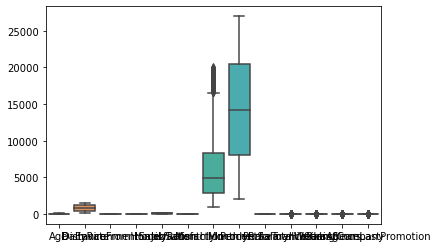

In [7]:
sns.boxplot(data = data)

<AxesSubplot:ylabel='MonthlyIncome'>

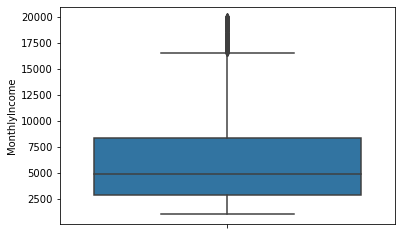

In [8]:
sns.boxplot(y = 'MonthlyIncome' , data = data)

### Removing Outliers By Using Winsorizing Technique

In [9]:
def outliers(data):
    a = data.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        data[i] = np.where(data[i]>upper_limit,upper_limit,data[i])
        data[i] = np.where(data[i]<lower_limit,lower_limit,data[i])

In [10]:
outliers(data)

<AxesSubplot:>

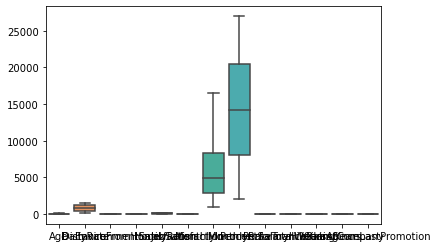

In [11]:
sns.boxplot(data = data)

In [12]:
data.Attrition.value_counts(dropna=False)

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
((1233)/1470)*100

83.87755102040816

#### 83.87 % Employees are not leaving the company or not leaving the organization.

# Step 4 : Data Visualization

In [14]:
Target = 'EnvironmentSatisfaction'
pd.crosstab(data[Target], columns='N', normalize=True)

col_0,N
EnvironmentSatisfaction,
1.0,0.193197
2.0,0.195238
3.0,0.308163
4.0,0.303401


In [15]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()

In [16]:
print('Numeric Columns \n', num_cols)
print('Non-Numeric Columns \n', non_num_cols)

Numeric Columns 
 ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']
Non-Numeric Columns 
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [17]:
pd.crosstab(data.JobSatisfaction,data[Target])

EnvironmentSatisfaction,1.0,2.0,3.0,4.0
JobSatisfaction,,,,
1.0,53,55,94,87
2.0,47,59,87,87
3.0,100,84,128,130
4.0,84,89,144,142


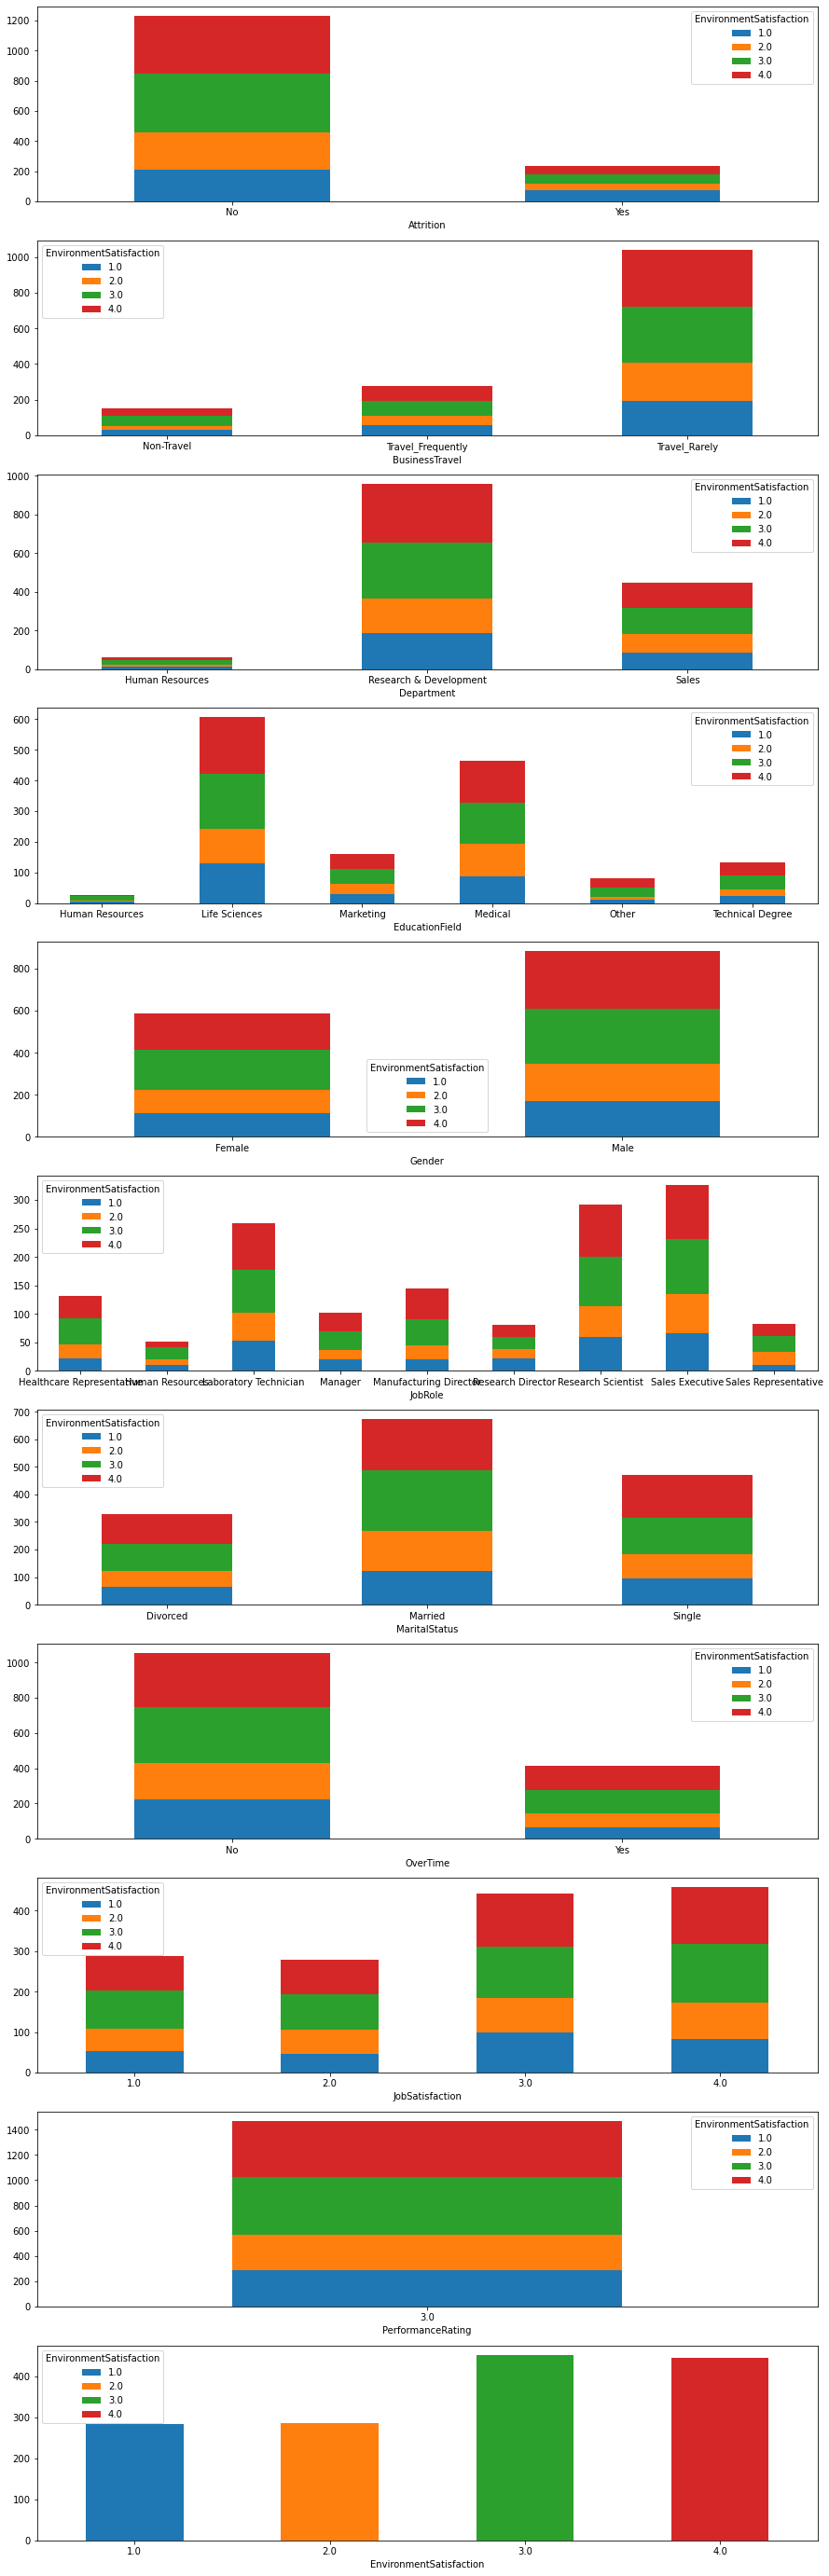

In [18]:
non_num_cols_viz = non_num_cols+['JobSatisfaction', 'PerformanceRating', 'EnvironmentSatisfaction']
fig, axes = plt.subplots(len(non_num_cols_viz), figsize=(15,50))
for i in range(len(non_num_cols_viz)):  # i = 0
    pd.crosstab(data[non_num_cols_viz[i]], data[Target]).plot(kind='bar', 
                                                                                  stacked=True, 
                                                                                  ax=axes[i],
   # sharex=False every plot should have different axis ax=axes[i],
                                                                                  rot=0)

<AxesSubplot:xlabel='Attrition'>

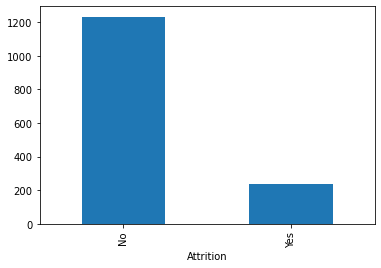

In [19]:
data.groupby('Attrition')['Attrition'].agg('count').plot.bar()

<AxesSubplot:title={'center':'Gender Vs Attrition'}, xlabel='Gender', ylabel='count'>

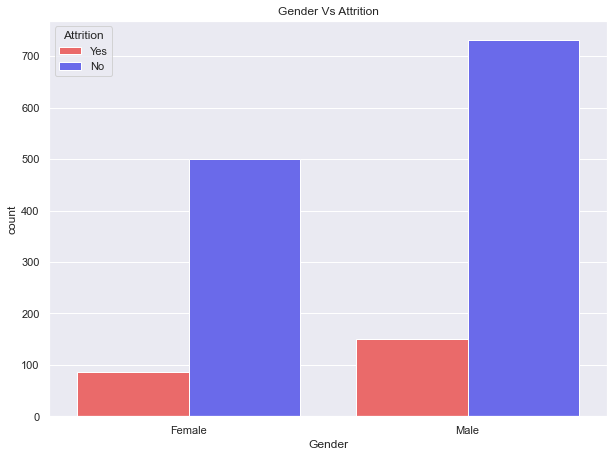

In [20]:
plt.figure(figsize=(22,16))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title('Gender Vs Attrition')
sns.countplot('Gender',hue='Attrition',data=data,palette='seismic_r')

<AxesSubplot:title={'center':'JobSatisfaction Vs Attrition'}, xlabel='JobSatisfaction', ylabel='count'>

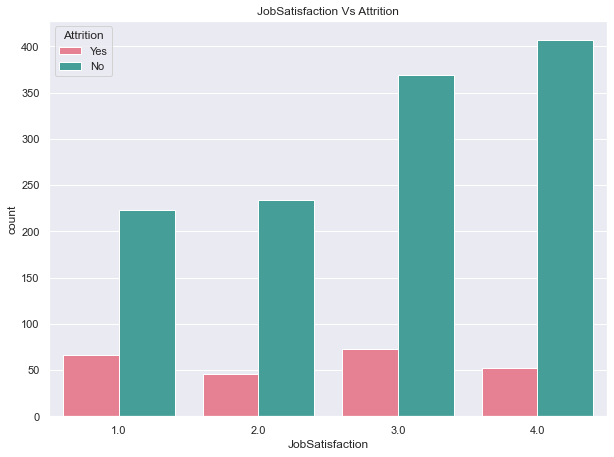

In [21]:
plt.figure(figsize=(22,16))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title('JobSatisfaction Vs Attrition')
sns.countplot('JobSatisfaction',hue='Attrition',data=data,palette='husl')

<AxesSubplot:title={'center':'EnvironmentSatisfaction Vs MonthlyIncome'}, xlabel='EnvironmentSatisfaction', ylabel='count'>

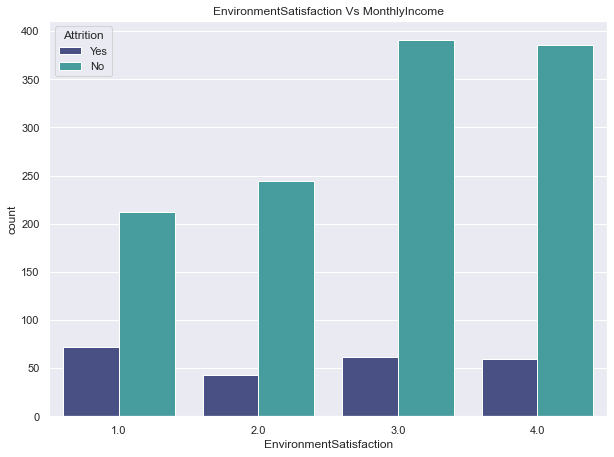

In [22]:
plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('EnvironmentSatisfaction Vs MonthlyIncome')
sns.countplot(data['EnvironmentSatisfaction'],hue=data['Attrition'],palette='mako')

In [23]:
data_1 = data.groupby("EducationField")["MonthlyIncome"].sum()
data_1

EducationField
Human Resources      184060.0
Life Sciences       3834672.0
Marketing           1147609.0
Medical             2948383.0
Other                486552.0
Technical Degree     750705.0
Name: MonthlyIncome, dtype: float64

Text(0.5, 1.0, 'Monthly Income With Respect to Education Field ')

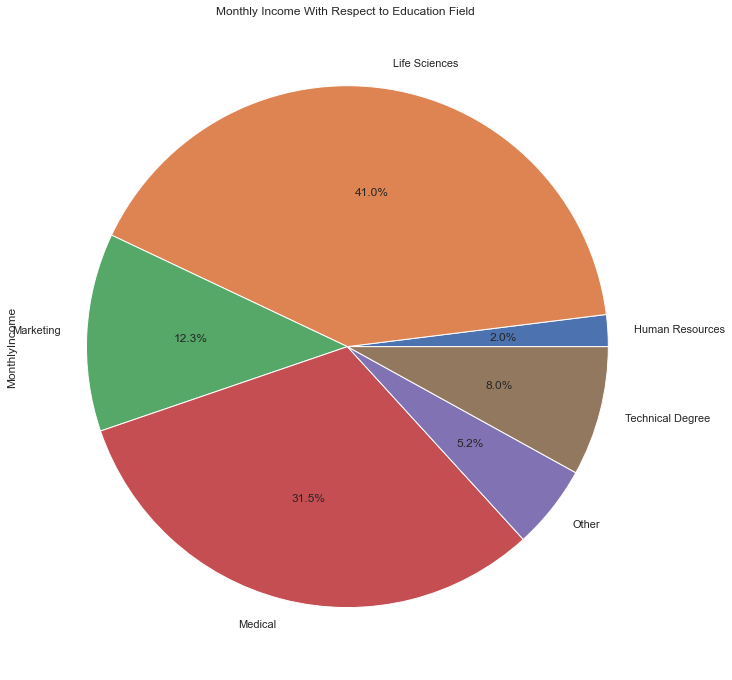

In [24]:
data_1.plot.pie(figsize=[12,12],autopct="%0.1f%%")
plt.title("Monthly Income With Respect to Education Field ")

<AxesSubplot:title={'center':'Department Vs Attrition'}, xlabel='Department', ylabel='count'>

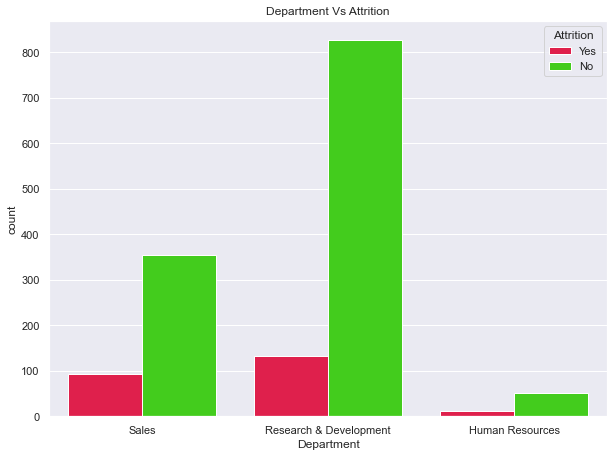

In [25]:
plt.figure(figsize=(22,16))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title('Department Vs Attrition')
sns.countplot(data['Department'],hue=data['Attrition'],palette='prism_r')

Text(0.5, 1.0, 'Attrition amongst different JobRoles')

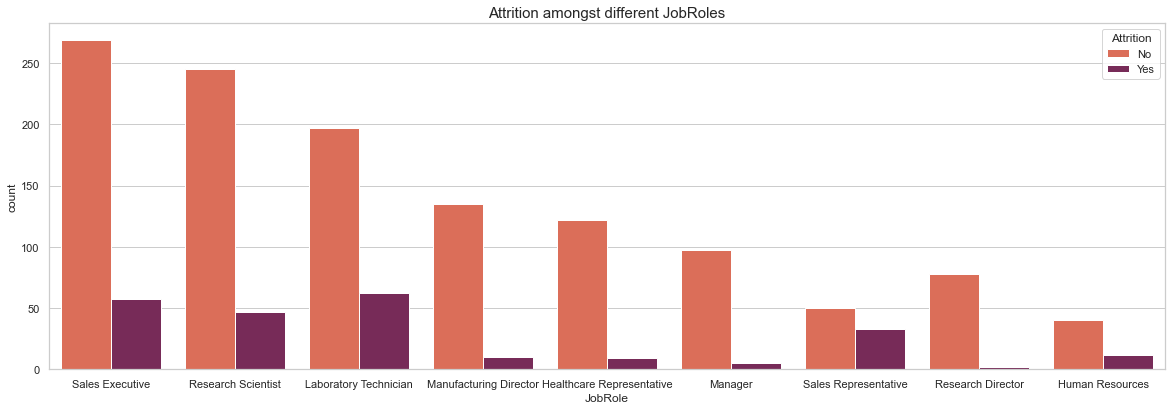

In [26]:
plt.figure(figsize=(20,14))
sns.set(style="whitegrid")


plt.subplot(211)
plt.title('JobRole Vs Attrition')
sns.countplot(data['JobRole'],palette='rocket_r',hue=data['Attrition'].sort_values(ascending=True))
plt.title('Attrition amongst different JobRoles',size=15)

<AxesSubplot:title={'center':'MaritalStatus Vs MonthlyIncome'}, xlabel='MaritalStatus', ylabel='count'>

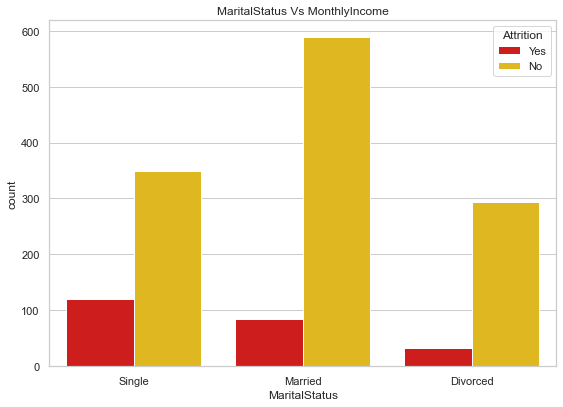

In [27]:
plt.figure(figsize=(20,14))
plt.subplot(221)
plt.title('MaritalStatus Vs MonthlyIncome')
sns.countplot(data['MaritalStatus'],hue=data['Attrition'],palette='hot')

#### Bad Rate Analysis

In [28]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [29]:
((237/1470)*100)

16.122448979591837

#### 16.12 %  Employees are  leaving the company or  leaving the organization for any reason.

In [30]:
import plotly.express as px

fig = px.pie(data,names='Attrition',color='Attrition',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

## Reject Employee data = Bad Employee

In [31]:
data_Yes= data[data["Attrition"] == "Yes"] 

data_Yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,Life Sciences,2.0,Female,94.0,...,4.0,Single,5993.0,19479.0,Yes,11.0,3.0,8.0,6.0,0.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,Other,4.0,Male,92.0,...,3.0,Single,2090.0,2396.0,Yes,15.0,3.0,7.0,0.0,0.0
14,28.0,Yes,Travel_Rarely,103.0,Research & Development,24.0,Life Sciences,3.0,Male,50.0,...,3.0,Single,2028.0,12947.0,Yes,14.0,3.0,6.0,4.0,0.0
21,36.0,Yes,Travel_Rarely,1218.0,Sales,9.0,Life Sciences,3.0,Male,82.0,...,1.0,Single,3407.0,6986.0,No,23.0,3.0,10.0,5.0,0.0
24,34.0,Yes,Travel_Rarely,699.0,Research & Development,6.0,Medical,2.0,Male,83.0,...,1.0,Single,2960.0,17102.0,No,11.0,3.0,8.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23.0,Yes,Travel_Frequently,638.0,Sales,9.0,Marketing,4.0,Male,33.0,...,1.0,Married,1790.0,26956.0,No,19.0,3.0,1.0,1.0,1.0
1442,29.0,Yes,Travel_Rarely,1092.0,Research & Development,1.0,Medical,1.0,Male,36.0,...,4.0,Married,4787.0,26124.0,Yes,14.0,3.0,4.0,2.0,2.0
1444,56.0,Yes,Travel_Rarely,310.0,Research & Development,7.0,Technical Degree,4.0,Male,72.0,...,3.0,Married,2339.0,3666.0,No,11.0,3.0,14.0,10.0,7.5
1452,50.0,Yes,Travel_Frequently,878.0,Sales,1.0,Life Sciences,2.0,Male,94.0,...,3.0,Divorced,6728.0,14255.0,No,12.0,3.0,12.0,6.0,0.0


In [32]:
data_Yes= data[data["Attrition"] == "No"] 

data_Yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,Life Sciences,3.0,Male,61.0,...,2.0,Married,5130.0,24907.0,No,23.0,3.0,10.0,10.0,1.0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,Life Sciences,4.0,Female,56.0,...,3.0,Married,2909.0,23159.0,Yes,11.0,3.0,8.0,8.0,3.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,Medical,1.0,Male,40.0,...,2.0,Married,3468.0,16632.0,No,12.0,3.0,6.0,2.0,2.0
5,32.0,No,Travel_Frequently,1005.0,Research & Development,2.0,Life Sciences,4.0,Male,79.0,...,4.0,Single,3068.0,11864.0,No,13.0,3.0,8.0,7.0,3.0
6,59.0,No,Travel_Rarely,1324.0,Research & Development,3.0,Medical,3.0,Female,81.0,...,1.0,Married,2670.0,9964.0,Yes,20.0,3.0,12.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Frequently,884.0,Research & Development,23.0,Medical,3.0,Male,41.0,...,4.0,Married,2571.0,12290.0,No,17.0,3.0,17.0,5.0,0.0
1466,39.0,No,Travel_Rarely,613.0,Research & Development,6.0,Medical,4.0,Male,42.0,...,1.0,Married,9991.0,21457.0,No,15.0,3.0,9.0,7.0,1.0
1467,27.0,No,Travel_Rarely,155.0,Research & Development,4.0,Life Sciences,2.0,Male,87.0,...,2.0,Married,6142.0,5174.0,Yes,20.0,3.0,6.0,6.0,0.0
1468,49.0,No,Travel_Frequently,1023.0,Sales,2.0,Medical,4.0,Male,63.0,...,2.0,Married,5390.0,13243.0,No,14.0,3.0,17.0,9.0,0.0


In [33]:
fig = px.sunburst(data_Yes, path=["Gender",'Department','EducationField',
                                    'JobRole','Attrition'])
fig.show()

# Step 5 : Breaking Data into Two Parts
* Quantitative Variable
* Qualitative Variable

In [34]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

In [35]:
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41.0,1102.0,1.0,2.0,94.0,4.0,5993.0,19479.0,11.0,3.0,8.0,6.0,0.0
1,49.0,279.0,8.0,3.0,61.0,2.0,5130.0,24907.0,23.0,3.0,10.0,10.0,1.0
2,37.0,1373.0,2.0,4.0,92.0,3.0,2090.0,2396.0,15.0,3.0,7.0,0.0,0.0


In [36]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


## Converting qualitative Variable into number

In [37]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0


## Combining the data set

In [38]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,1,2,2,1,0,7,2,1,41.0,1102.0,...,2.0,94.0,4.0,5993.0,19479.0,11.0,3.0,8.0,6.0,0.0
1,0,1,1,1,1,6,1,0,49.0,279.0,...,3.0,61.0,2.0,5130.0,24907.0,23.0,3.0,10.0,10.0,1.0
2,1,2,1,4,1,2,2,1,37.0,1373.0,...,4.0,92.0,3.0,2090.0,2396.0,15.0,3.0,7.0,0.0,0.0
3,0,1,1,1,0,6,1,1,33.0,1392.0,...,4.0,56.0,3.0,2909.0,23159.0,11.0,3.0,8.0,8.0,3.0
4,0,2,1,3,1,2,1,0,27.0,591.0,...,1.0,40.0,2.0,3468.0,16632.0,12.0,3.0,6.0,2.0,2.0


# Step 6 : Data Partition

In [39]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('Attrition', axis = 1)
Y = Final_combined[['Attrition']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

# Step 7 : Model building

# Hypothesis
* H0 :- There is no log linear relationship between Attrition and all independent Variable.

Vs

* H1 :- There is log linear relationship between Attrition and all independent Variable.

* Alpha = 0.05 (5%).

# Logistics Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

In [41]:
output.intercept_  # beta 0 

array([0.00012553])

In [42]:
output.coef_  # Beta 1 --

array([[-1.32669959e-03,  6.44295412e-03,  7.46901476e-04,
         6.51520258e-04,  2.12486123e-02,  1.60001999e-02,
         1.77777656e-02, -1.21276296e-02, -4.63040964e-04,
         4.12600206e-02, -1.40892905e-02, -2.93160825e-03,
        -1.41610470e-02, -1.04617961e-04, -1.41175087e-06,
        -9.02358930e-04,  3.76740647e-04, -2.90917210e-02,
        -4.69785387e-02,  1.67029998e-02]])

In [43]:
output.n_features_in_

20

In [44]:
output.feature_names_in_

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DailyRate',
       'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsSinceLastPromotion'], dtype=object)

* We Reject Ho
* There is log linear relationship between Attrition and BusinessTravel,Department,EducationField,JobRole.

# Step 8 : Predictions on Train Dataset

In [45]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
1361,1,1,4,1,2,1,0,26.0,1096.0,6.0,...,61.0,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0,0
610,2,1,5,1,5,0,1,27.0,269.0,5.0,...,42.0,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0,0
542,2,1,1,0,4,2,1,38.0,168.0,1.0,...,81.0,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0,0
950,0,2,1,0,7,0,1,31.0,587.0,2.0,...,57.0,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5,0
344,2,1,5,1,4,2,0,35.0,1296.0,5.0,...,62.0,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0,0


In [46]:
train['Predicted']=output.predict(X_train)    #predict_proba   if you want but prefer predict
train.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predicted
1361,1,1,4,1,2,1,0,26.0,1096.0,6.0,...,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0,0,0
610,2,1,5,1,5,0,1,27.0,269.0,5.0,...,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0,0,0
542,2,1,1,0,4,2,1,38.0,168.0,1.0,...,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0,0,0
950,0,2,1,0,7,0,1,31.0,587.0,2.0,...,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5,0,0
344,2,1,5,1,4,2,0,35.0,1296.0,5.0,...,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0,0,0


# Step 9 : Model Performance Metrics

In [47]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Attrition'])
matrix

array([[984, 185],
       [  2,   5]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       0.71      0.03      0.05       190

    accuracy                           0.84      1176
   macro avg       0.78      0.51      0.48      1176
weighted avg       0.82      0.84      0.77      1176



* Accuracy of Model is 84 %,Hence Model is good Fit.
* Accuracy of Bad Employee Capture by Model is 3% ( Sensitivity ).
* Accuracy of Good Employee Capture by Model is 100% (Specificity).

# Step 10 : Predictions on Test Dataset

In [49]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
880,1,1,4,0,2,1,0,32.0,116.0,13.0,...,77.0,2.0,2743.0,7331.0,20.0,3.0,2.0,2.0,2.0,0
152,2,2,2,1,8,1,1,53.0,1436.0,6.0,...,34.0,3.0,2306.0,16047.0,20.0,3.0,13.0,7.0,4.0,0
1466,2,1,3,1,0,1,0,39.0,613.0,6.0,...,42.0,1.0,9991.0,21457.0,15.0,3.0,9.0,7.0,1.0,0
1084,2,2,5,1,7,1,1,34.0,971.0,1.0,...,64.0,3.0,7083.0,12288.0,14.0,3.0,10.0,10.0,7.5,0
1086,1,1,3,1,5,2,1,50.0,333.0,22.0,...,88.0,4.0,14411.0,24450.0,13.0,3.0,28.5,18.0,7.5,0


In [50]:
test['Predicted']=output.predict(X_test)
test.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predicted
880,1,1,4,0,2,1,0,32.0,116.0,13.0,...,2.0,2743.0,7331.0,20.0,3.0,2.0,2.0,2.0,0,0
152,2,2,2,1,8,1,1,53.0,1436.0,6.0,...,3.0,2306.0,16047.0,20.0,3.0,13.0,7.0,4.0,0,0
1466,2,1,3,1,0,1,0,39.0,613.0,6.0,...,1.0,9991.0,21457.0,15.0,3.0,9.0,7.0,1.0,0,0
1084,2,2,5,1,7,1,1,34.0,971.0,1.0,...,3.0,7083.0,12288.0,14.0,3.0,10.0,10.0,7.5,0,0
1086,1,1,3,1,5,2,1,50.0,333.0,22.0,...,4.0,14411.0,24450.0,13.0,3.0,28.5,18.0,7.5,0,0


# Step 11 : Model Performance Metrics on Test data

In [51]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Attrition'])
print(matrix)

[[247  46]
 [  0   1]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(test['Attrition'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       1.00      0.02      0.04        47

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.84      0.78       294



* Accuracy of Model is 84 %,Hence Model is good Fit
* Accuracy of Bad Customer Capture by Model is 2 % (Sensitivity)
* Accuracy of Good Customer Capture by Model is 100 % (Specificity)

## Coefficient
* For future Prediction below 4 variable data is mandatory.
* Note :- If anyone is not present output will not be reliable.

In [53]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,0.000126


In [54]:
rows=['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DailyRate',
       'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsSinceLastPromotion']

abc=pd.DataFrame(output.coef_.T,index=rows,columns=['Coefficient'])
abc

,Coefficient
BusinessTravel,-0.001327
Department,0.006443
EducationField,0.000747
Gender,0.000652
JobRole,0.021249
MaritalStatus,0.016000
OverTime,0.017778
Age,-0.012128
DailyRate,-0.000463
DistanceFromHome,0.041260


In [55]:
Model_Values.append(abc)

,Coefficient
Intercept,0.000126
BusinessTravel,-0.001327
Department,0.006443
EducationField,0.000747
Gender,0.000652
JobRole,0.021249
MaritalStatus,0.016000
OverTime,0.017778
Age,-0.012128
DailyRate,-0.000463


# Finished

# Thank You....!